In [1]:
!pip install matplotlib numpy

In [2]:
import pandas as pd

df = pd.read_csv('all.csv')

df.head(10)

,run,final_rank,designed_sequence,designed_chain_sequence,num_design,design_to_target_iptm,min_design_to_target_pae,design_ptm,filter_rmsd,designfolding-filter_rmsd,plip_hbonds_refolded,delta_sasa_refolded,design_largest_hydrophobic_patch_refolded,design_chain_hydrophobicity,design_hydrophobicity,loop,helix,sheet,file_name
0,prot_1k,1,GRVEVTSPSGLTCIAESDGIRITVELRDANGKVVAKGFGEFMVKAV...,GRVEVTSPSGLTCIAESDGIRITVELRDANGKVVAKGFGEFMVKAV...,86,0.77195,2.66389,0.92621,0.80472,1.12748,7,1447.84668,986.96466,42.9911,42.9911,0.43023,0.00000,0.56977,protein_vs_2vsm_350.cif
1,prot_1k,2,EVVTVPVGGTAYLTCEFSEEFDSVKWTKSDGSPVPPRAVLDSLRPG...,EVVTVPVGGTAYLTCEFSEEFDSVKWTKSDGSPVPPRAVLDSLRPG...,102,0.86681,1.17307,0.96145,0.89660,1.89332,11,1267.00684,841.76099,46.2605,46.2605,0.46078,0.02941,0.50980,protein_vs_2vsm_165.cif
2,prot_1k,3,SRSVTLGNGATVTLPEEMTGVELAEKVYAAGGQTIAGDFTVAVRDP...,SRSVTLGNGATVTLPEEMTGVELAEKVYAAGGQTIAGDFTVAVRDP...,74,0.73699,2.84475,0.93860,0.40913,1.59490,6,1349.93652,853.80701,48.5536,48.5536,0.33784,0.28378,0.37838,protein_vs_2vsm_180.cif
3,prot_1k,4,GSGSGTLTDVDDPSLKLTATLHADGTLTVTLPFFNPCTALTVKVLD...,GSGSGTLTDVDDPSLKLTATLHADGTLTVTLPFFNPCTALTVKVLD...,98,0.59346,3.89635,0.89572,1.33990,1.51359,6,1296.90332,1253.23035,49.9127,49.9127,0.38776,0.00000,0.61224,protein_vs_2vsm_400.cif
4,prot_1k,5,ARAARLSVSPKEAKVGEKVIIHLSRAGYSRYTYHLYMRNLETGEVT...,ARAARLSVSPKEAKVGEKVIIHLSRAGYSRYTYHLYMRNLETGEVT...,101,0.75913,2.73810,0.93070,0.67720,1.52573,12,1481.53125,614.32367,56.6743,56.6743,0.43564,0.02970,0.53465,protein_vs_2vsm_249.cif
5,prot_1k,6,VKLSCKITKANLRYNTIHWYLQAPGQERELVAEIDGSNPGNTTYAD...,VKLSCKITKANLRYNTIHWYLQAPGQERELVAEIDGSNPGNTTYAD...,106,0.69087,3.13823,0.91647,0.81494,1.11135,15,1360.41504,604.17419,44.2024,44.2024,0.52830,0.02830,0.44340,protein_vs_2vsm_097.cif
6,prot_1k,7,VQLVESGGGLVQAGGSLRLSCAGDISSGDSMSWYRQAPGKEREFVA...,VQLVESGGGLVQAGGSLRLSCAGDISSGDSMSWYRQAPGKEREFVA...,112,0.57016,5.79777,0.90711,0.62256,0.93767,10,1469.29199,360.83948,44.8148,44.8148,0.45536,0.02679,0.51786,protein_vs_2vsm_172.cif
7,prot_1k,8,STASATFSLNGEGIKSVTVTKDGKETCTSRPMRFNLFFEEASCTLS...,STASATFSLNGEGIKSVTVTKDGKETCTSRPMRFNLFFEEASCTLS...,97,0.59113,4.57805,0.87708,0.79545,0.99569,7,1426.67188,914.88159,42.1258,42.1258,0.39175,0.00000,0.60825,protein_vs_2vsm_029.cif
8,prot_1k,9,ATATSGSLTLSGVPSSLKVGDTLTLTCTCSDPSYVSVYWYRQPPGS...,ATATSGSLTLSGVPSSLKVGDTLTLTCTCSDPSYVSVYWYRQPPGS...,103,0.55996,5.91412,0.91617,0.71477,1.11231,10,1194.87988,810.36694,49.1414,49.1414,0.42718,0.05825,0.51456,protein_vs_2vsm_486.cif
9,prot_1k,10,APVQVTPPITLTVPANSTVSKTFTIPEAGTYRLRVTVPASYLPGTV...,APVQVTPPITLTVPANSTVSKTFTIPEAGTYRLRVTVPASYLPGTV...,102,0.65906,4.37772,0.87408,1.11913,1.60054,7,1171.11523,776.79755,48.3768,48.3768,0.36275,0.00000,0.63725,protein_vs_2vsm_410.cif


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your combined CSV
df = pd.read_csv("all.csv")

# Metrics you want as columns in the heatmaps
metrics = [
    "design_to_target_iptm",
    "min_design_to_target_pae",
    "design_ptm",
    "filter_rmsd",
    "designfolding-filter_rmsd",
    "plip_hbonds_refolded",
    "delta_sasa_refolded",
    "design_largest_hydrophobic_patch_refolded",
    "design_chain_hydrophobicity",
    "design_hydrophobicity",
]

def minmax_normalize(values, axis=0):
    """
    Min-max normalize along the given axis so results are in [0, 1].
    axis=0 → per column (per metric).
    """
    vmin = np.nanmin(values, axis=axis, keepdims=True)
    vmax = np.nanmax(values, axis=axis, keepdims=True)
    denom = vmax - vmin

    # Avoid division by zero (constant columns): set to 0.5
    denom[denom == 0] = np.nan
    norm = (values - vmin) / denom
    norm = np.where(np.isnan(norm), 0.5, norm)

    return norm

import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(values,
                 row_labels,
                 col_labels,
                 title="",
                 xlabel="",
                 ylabel="",
                 annotate=False,
                 annot_values=None,
                 figsize=None):
    """
    values:       matrix used for colors (e.g., normalized)
    annot_values: matrix used for text labels (e.g., raw); if None, uses `values`
    """
    values = np.asarray(values, dtype=float)
    if annot_values is None:
        annot_values = values
    else:
        annot_values = np.asarray(annot_values, dtype=float)

    # Default figsize if not provided
    if figsize is None:
        width = max(0.6 * len(col_labels) + 2, 6)
        height = max(0.4 * len(row_labels) + 2, 4)
        figsize = (width, height)

    fig, ax = plt.subplots(figsize=figsize)

    im = ax.imshow(values, aspect="auto")

    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if annotate:
        for i in range(values.shape[0]):
            for j in range(values.shape[1]):
                ax.text(
                    j, i,
                    f"{annot_values[i, j]:.2f}",  # <- raw values here
                    ha="center",
                    va="center",
                )

    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Normalized value (0–1)")

    plt.tight_layout()
    plt.show()

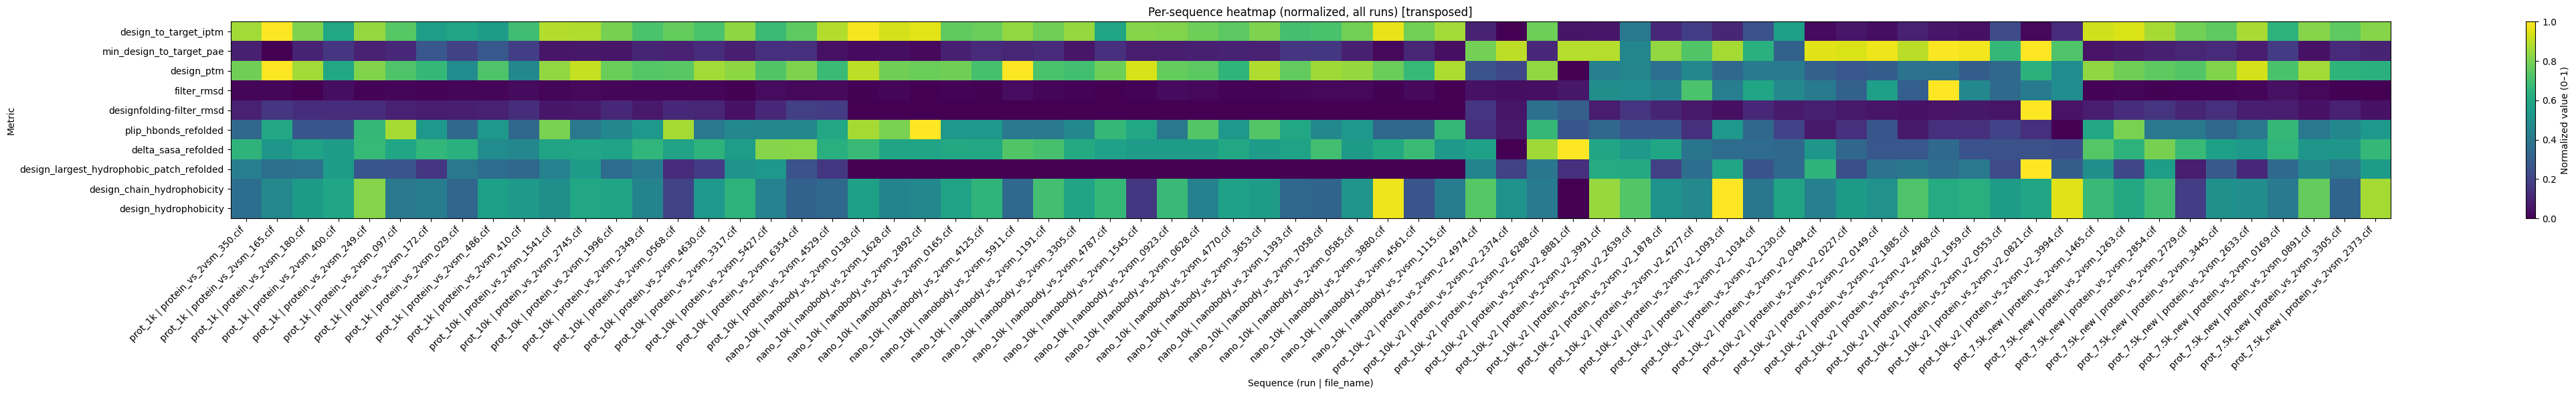

In [4]:
def sequence_heatmap(df, metrics, run=None, max_rows=100, transpose=False):
    sub = df.copy()

    if run is not None:
        sub = sub[sub["run"] == run]

    # Fill missing metric values with 0
    sub[metrics] = sub[metrics].fillna(0)

    if sub.empty:
        print("No rows to plot after filtering.")
        return

    # OPTIONAL: if you want df order preserved, don’t sort here.
    # If you *do* want grouping by run + rank, uncomment:
    # if "final_rank" in sub.columns:
    #     sub = sub.sort_values(["run", "final_rank"], ascending=[True, True])

    # Limit number of sequences for readability
    if len(sub) > max_rows:
        sub = sub.head(max_rows)

    # Row labels = "run | file_name"
    seq_labels = (
        sub.apply(lambda r: f"{r['run']} | {r['file_name']}", axis=1)
           .astype(str)
           .tolist()
    )

    raw_values = sub[metrics].to_numpy()
    norm_values = minmax_normalize(raw_values, axis=0)  # normalize per metric

    if not transpose:
        values = norm_values
        row_labels = seq_labels
        col_labels = metrics
        xlabel = "Metric"
        ylabel = "Sequence (run | file_name)"
    else:
        values = norm_values.T
        row_labels = metrics
        col_labels = seq_labels
        xlabel = "Sequence (run | file_name)"
        ylabel = "Metric"

    plot_heatmap(
        values,
        row_labels=row_labels,
        col_labels=col_labels,
        title=f"Per-sequence heatmap (normalized, {'all runs' if run is None else run})"
              + (" [transposed]" if transpose else ""),
        xlabel=xlabel,
        ylabel=ylabel,
        annotate=False,
    )

# Examples:
# All runs together (top 100 sequences overall)
sequence_heatmap(df, metrics, run=None, max_rows=100, transpose=True)




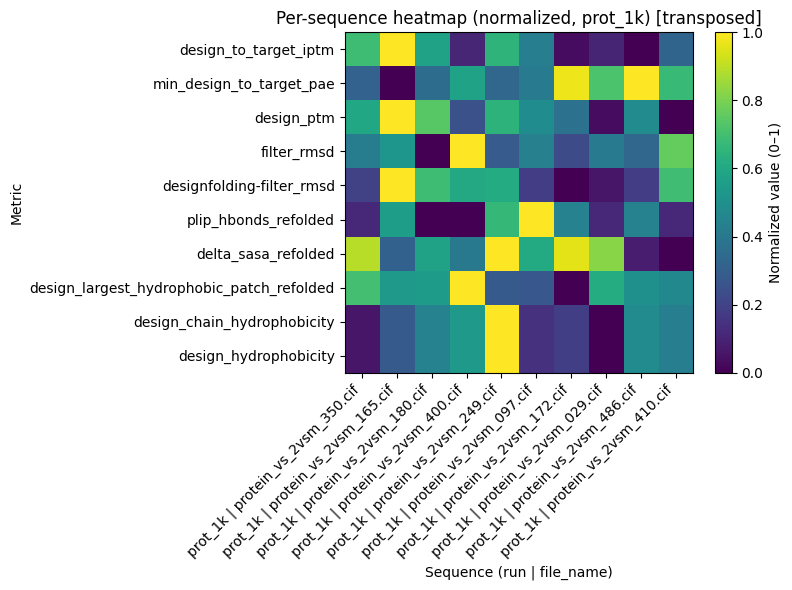

In [5]:
# One specific batch:
sequence_heatmap(df, metrics, run="prot_1k", max_rows=100, transpose=True)

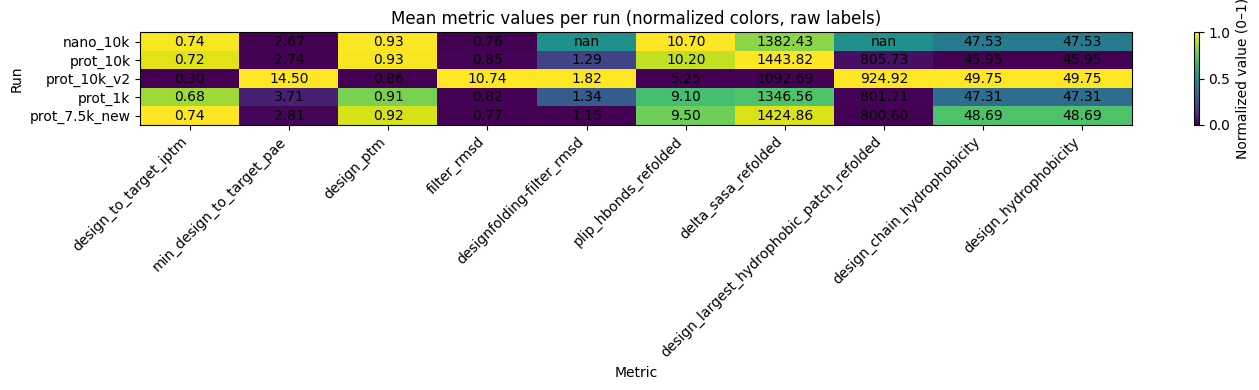

In [6]:
def batch_mean_heatmap(df, metrics):
    summary = (
        df[["run"] + metrics]
        #.dropna(subset=metrics)
        .groupby("run", as_index=True)
        .mean()
        #.sort_index()
    )

    if summary.empty:
        print("No data to summarize.")
        return

    raw_values = summary.to_numpy()                       # original means
    norm_values = minmax_normalize(raw_values, axis=0)    # 0–1 per metric

    row_labels = summary.index.tolist()
    col_labels = summary.columns.tolist()

    figsize = (1.0 * len(col_labels) + 4, 4)

    plot_heatmap(
        norm_values,
        row_labels=row_labels,
        col_labels=col_labels,
        title="Mean metric values per run (normalized colors, raw labels)",
        xlabel="Metric",
        ylabel="Run",
        annotate=True,
        annot_values=raw_values,   # <- this is the key line
        figsize=figsize,
    )

# Example:
batch_mean_heatmap(df, metrics)